# L1 norm

The $L^1$ norm of a vector $\textbf{x}=\begin{pmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{n}\end{pmatrix}$ is defined as $|\textbf{x}|_1=\displaystyle\sum_{k=1}^n |x_k|$.

In [1]:
import numpy as np
import numpy.typing as npt
import scipy.linalg


def l1_direct(a: npt.NDArray) -> float:
    return np.abs(a).sum().item()


def l1_norm(a: npt.NDArray) -> float:
    return np.linalg.norm(a.ravel(), ord=1).item()


def l1_scipy(a: npt.NDArray) -> float:
    return scipy.linalg.norm(a.ravel(), ord=1).item()

In [2]:
import math

rng = np.random.default_rng(0)
a = rng.standard_normal((500, 500))
assert math.isclose(l1_direct(a), l1_norm(a))
assert math.isclose(l1_direct(a), l1_scipy(a))

Output()

(1.8000000000000016e-06, 0.0018834309999999999)


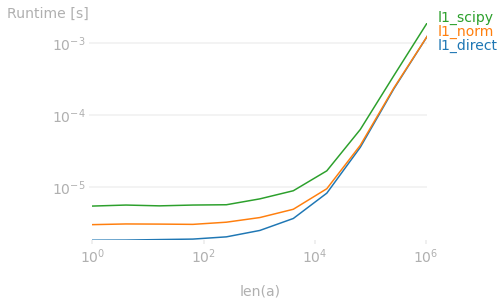

In [3]:
import perfplot

perfplot.show(
    setup=lambda n: rng.standard_normal(n),
    kernels=[l1_direct, l1_norm, l1_scipy],
    n_range=[(2 ** k) ** 2 for k in range(11)],
    equality_check=None,
    xlabel='len(a)',
)